![title](img/NumPy.jpeg)

# Programming for Data Analysis Practical Assignment 2018


## Create a Jupyter notebook explaining the use of the numpy.random package in Python. Including detailed explainations of at lease five of the distributions provided for the package. 

## There are four distinct tasks to be carried out:


### 1. Explain the overall purpose of the package.

### 2. Explain the use of the "Simple random data" and Permutations" functions.

### 3. Explain the use and purpose of at least five "Distributions" functions.

### 4. Explain the use of seeds in generating pseudorandom numbers.

### 1. Explain the overall purpose of the package

Although NumPy, short for Numerical Python, does not provide modelling or scientific functionality it is a powerful tool package for efficient multidimensional array operations. Enabling reading and writing arithmatic operations on large arrays of data without having to write loops. It includeS a C Application Programming Interface (API) that connects it with C, C++ and FORTRAN libraries. Features include useful linear algebra, Fourier transform, and random number capabilities.  

NumPy can create random numbers based on different types of statistical distribution. Random numbers have many important applications, from the crytography used to keep things like banking transactions secure to the selection of samples from population for statistical analysis.

numpy.random is a routine docstring in the NumPy package for the generation of pseudorandom numbers. The generation of pseudorandom numbers is based on the Mersenne Twister: a 623-dimensionally equidistributed uniform pseudorandom number generator (also known as PRNG's). 

The Mersenne Twister was first proposed in 1998 by Makato Matsumoto and Takuji Nishimura of Keio University to solve the problem of generating 'high-quality' random numbers with computers, it is now the basis of how the NumPy package creates pseudorandom numbers. It is important to note that PRNG's are not truly random numbers, they are based on complex algorithms such as MT19937. Seeds are used to create a vector a starting point within the algorithm, from which the random numbers are generated. A seed may be automatically selected based on a computer system's random number generator device or its clock. A seed can also be set by the user, and if the same seed is used in the future the same set of random numbers is created.

### 2. Explain the use of "Simple random data" and "Permutations" functions

#### Simple random data

There are 10 options for creating simple random 

In [1]:
# Import the NumPy package
import numpy as np

In [2]:
# Create a three dimensional random array based on a uniform distribution
np.random.rand(3,2, 3)

array([[[0.3839688 , 0.12604793, 0.28266666],
        [0.81633862, 0.26999661, 0.19870132]],

       [[0.2856621 , 0.1037474 , 0.08851849],
        [0.66334405, 0.96775534, 0.87405009]],

       [[0.56582192, 0.7607286 , 0.12423674],
        [0.53040477, 0.64409624, 0.0677435 ]]])

In [3]:
# Import the Matplotlib package to enable plotting
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 99., 104., 100.,  84., 102.,  97., 112.,  89., 101., 112.]),
 array([0.0014866 , 0.10121539, 0.20094417, 0.30067295, 0.40040173,
        0.50013052, 0.5998593 , 0.69958808, 0.79931686, 0.89904565,
        0.99877443]),
 <a list of 10 Patch objects>)

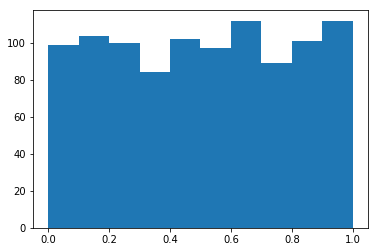

In [4]:
a = np.random.rand(1000)
plt.hist(a)


#### The permutations function randomly arranges a series of numbers

#### This can be done either by specifying a range

In [5]:
# Arrange the numbers from 0 to 49 in a random order
np.random.permutation(50)

array([49,  4, 28, 26, 15, 42,  6, 13, 33, 44, 14, 23, 37, 21,  2, 43, 10,
       22,  8,  5,  7, 38, 16, 30, 24, 32,  0, 34, 12, 29, 25,  1, 47, 45,
       18, 39, 48, 17, 27,  3, 40, 41, 20, 31, 46, 35, 36, 11,  9, 19])

#### Or by passing a list

In [6]:
# Arrange a list of defined numbers in a random order
np.random.permutation([10, 2, 2, 3, 4, 5, 2, 2])

array([ 2,  2,  3, 10,  2,  2,  5,  4])

Return a

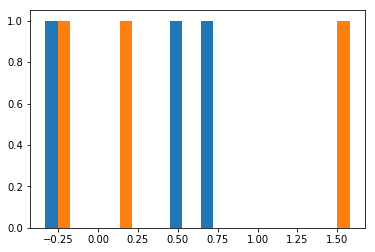

In [7]:
b = np.random.randn(3, 2)
plt.hist(b)
plt.show()

### 3. Explain the use and purpose of at least 5 "Distributions" functions

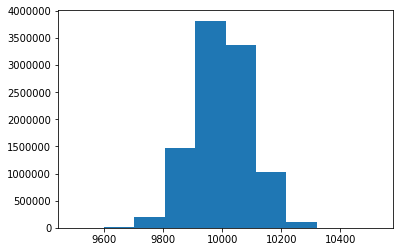

In [8]:
# Explain this binomial plot - format axis and colour
c = np.random.binomial(100000, 0.1, size=10000000)
plt.hist(c)
plt.show()

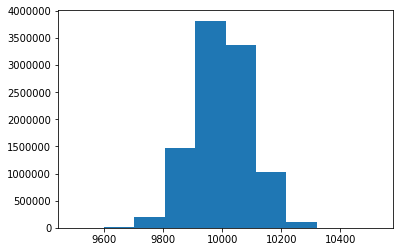

In [9]:
# Explain this beta plot - format axis and colour
d = np.random.beta(10000, 0.1, size=1000000)
plt.hist(c)
plt.show()

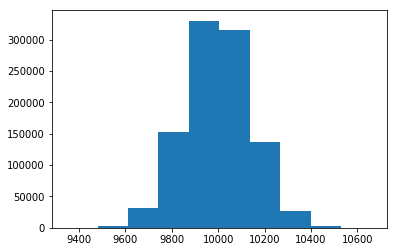

In [10]:
# Explain this chisquare plot - format axis and colour
d = np.random.chisquare(10000, 1000000)
plt.hist(d)
plt.show()

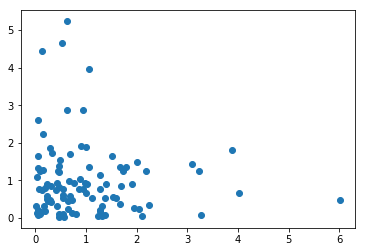

In [11]:
# Explain this exponential plot - format axis and colour
e = np.random.exponential(1, 100)
f = np.random.exponential(1, 100)
plt.scatter(e, f)
plt.show()

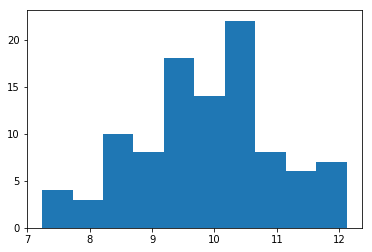

In [12]:
# Explain this normal distribution - format axis and colour
g = np.random.normal(loc=10, scale=1.0, size=100)
plt.hist(g)
plt.show()

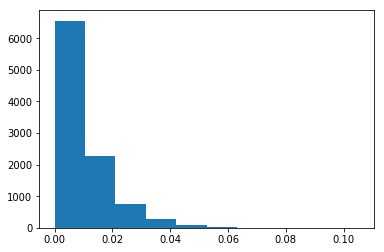

In [13]:
# Explain this Pareto Distribution - format the axis
h = np.random.pareto(100, size=10000)
plt.hist(h)
plt.show()

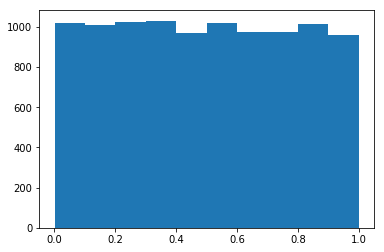

In [14]:
# Explain this uniform distribution - format the axis
i = np.random.uniform(low=0.0, high=1.0, size=10000)
plt.hist(i)
plt.show()

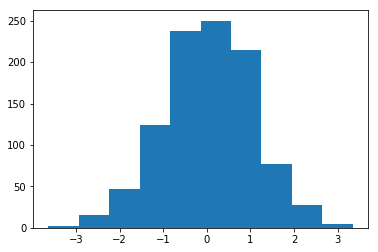

In [15]:
# Explain this standard_t distibution - format the axis
j = np.random.standard_t(300, size=1000)
plt.hist(j)
plt.show()


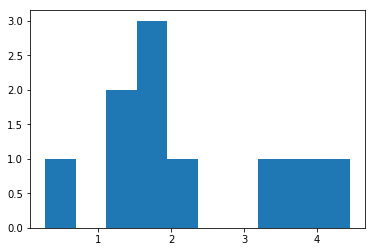

In [20]:
# Explain this Rayleigh distibution - format the axis
k = np.random.rayleigh(scale=2.0, size=10)
plt.hist(k)
plt.show()

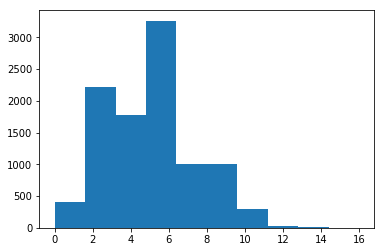

In [21]:
# Explain tis Poisson Distribution - format the axis
l = np.random.poisson(5, 10000)
plt.hist(l)
plt.show()